In [1]:
import os
import re
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import classification_report
import string
from sklearn.calibration import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score, recall_score
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Embedding, GlobalAveragePooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd
from gensim.models import KeyedVectors

2024-10-20 20:42:17.471469: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-20 20:42:17.475044: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-20 20:42:17.493141: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-20 20:42:17.517841: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-20 20:42:17.524627: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-20 20:42:17.544955: I tensorflow/core/platform/cpu_feature_gu

#  Punto 2

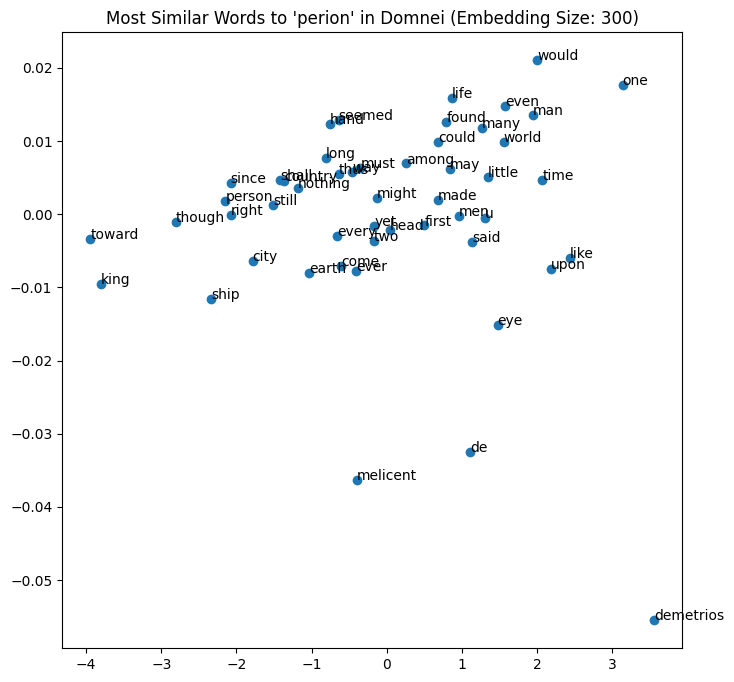

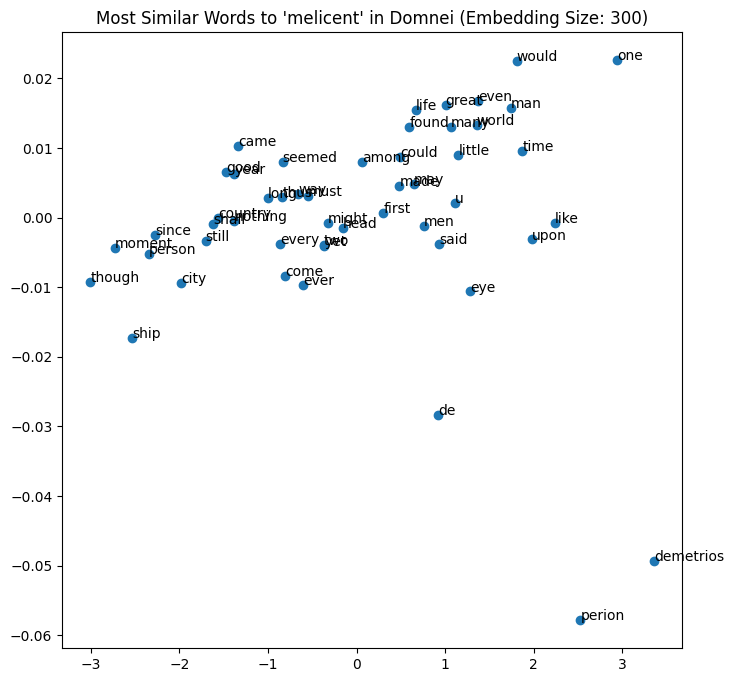

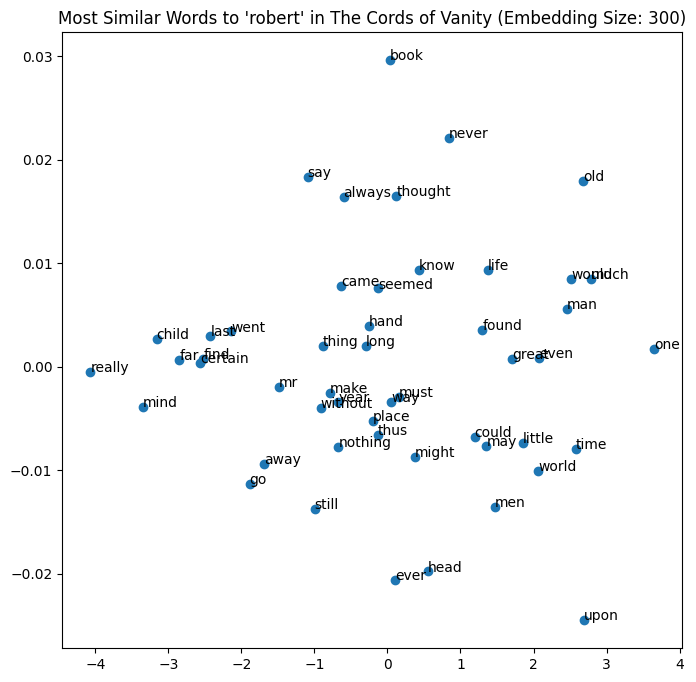

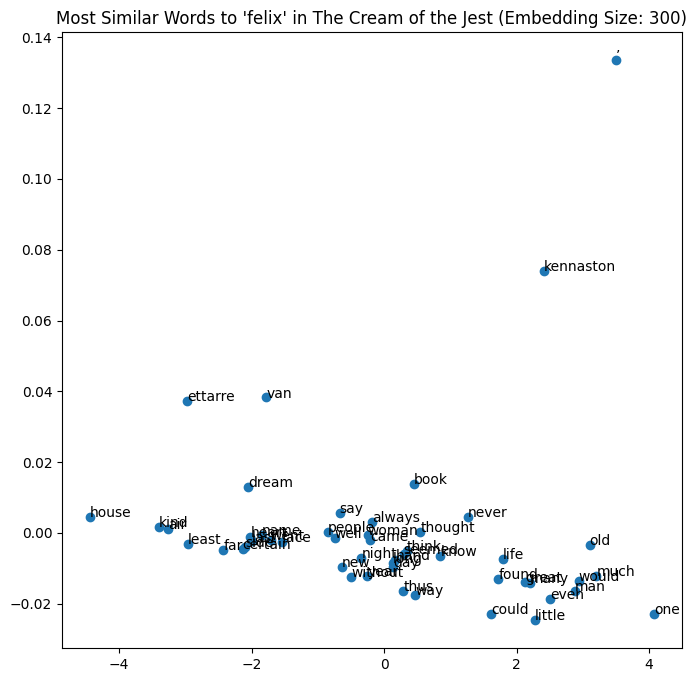

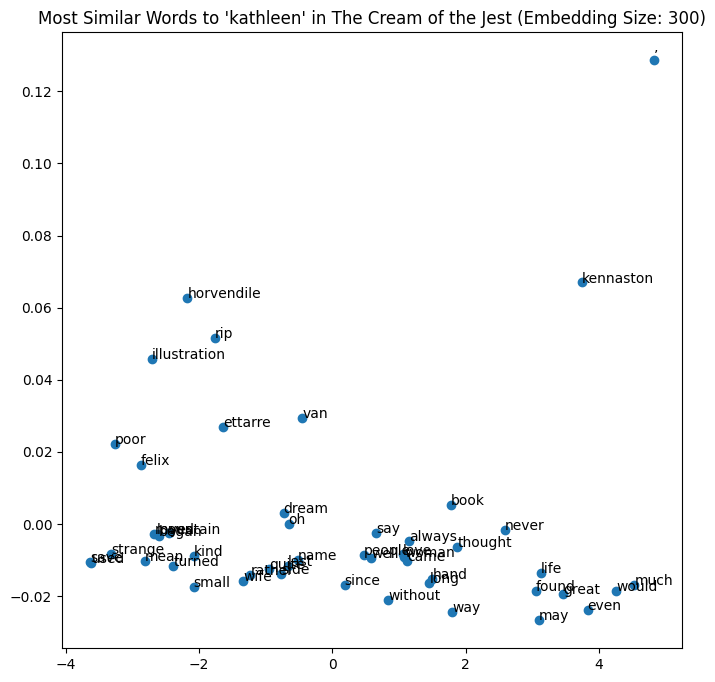

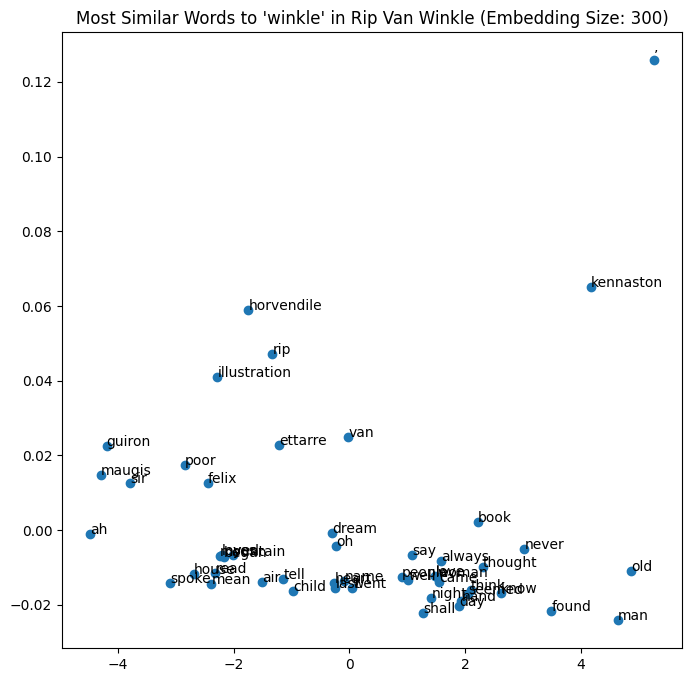

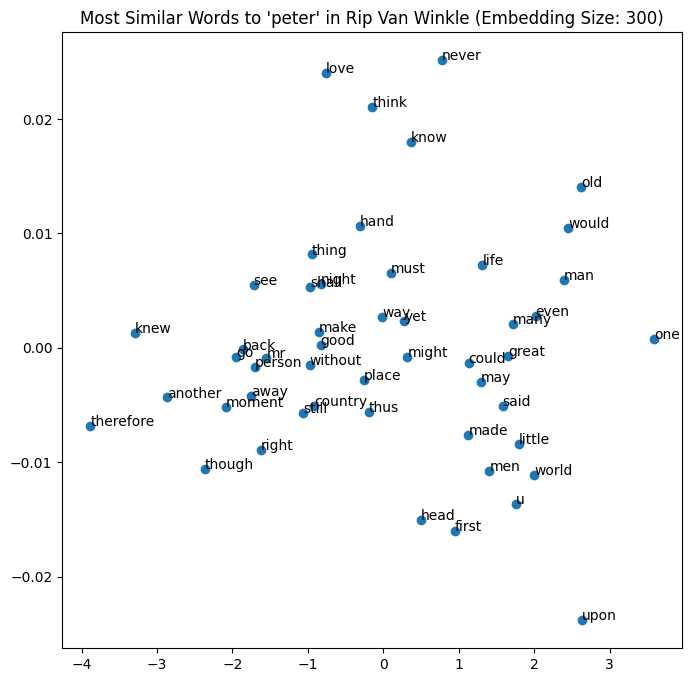

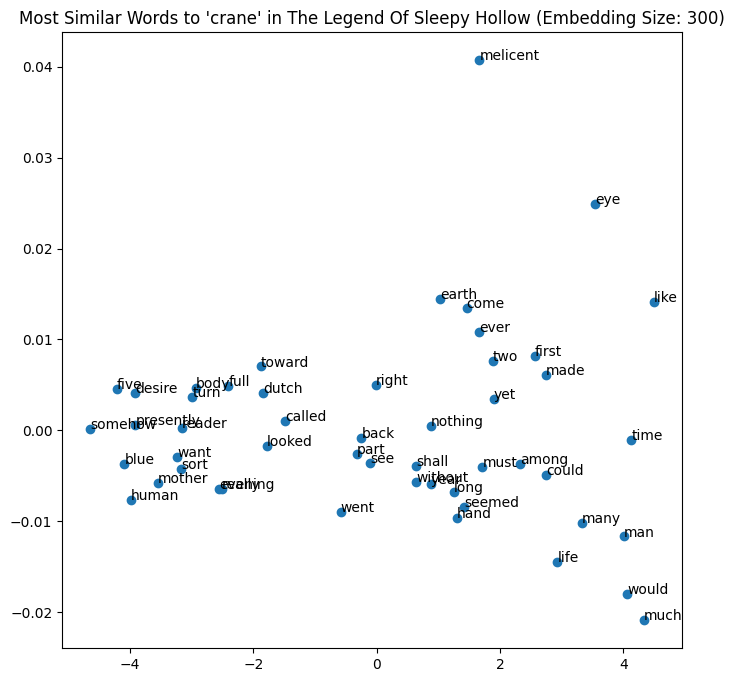

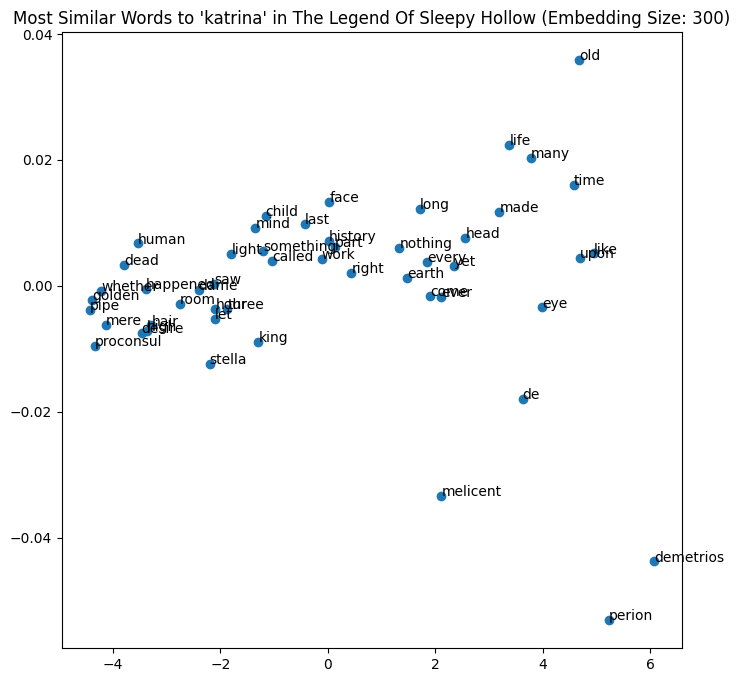

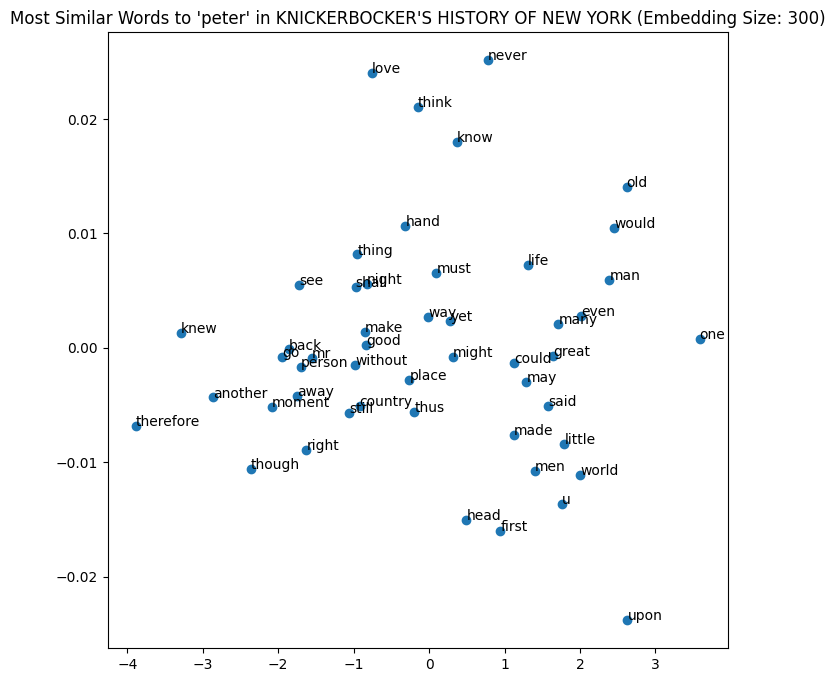

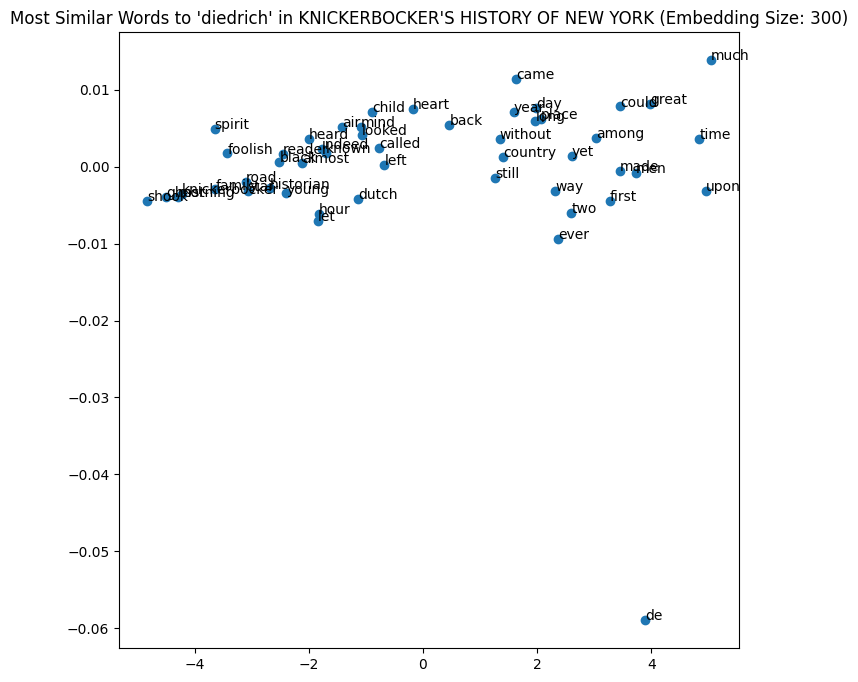

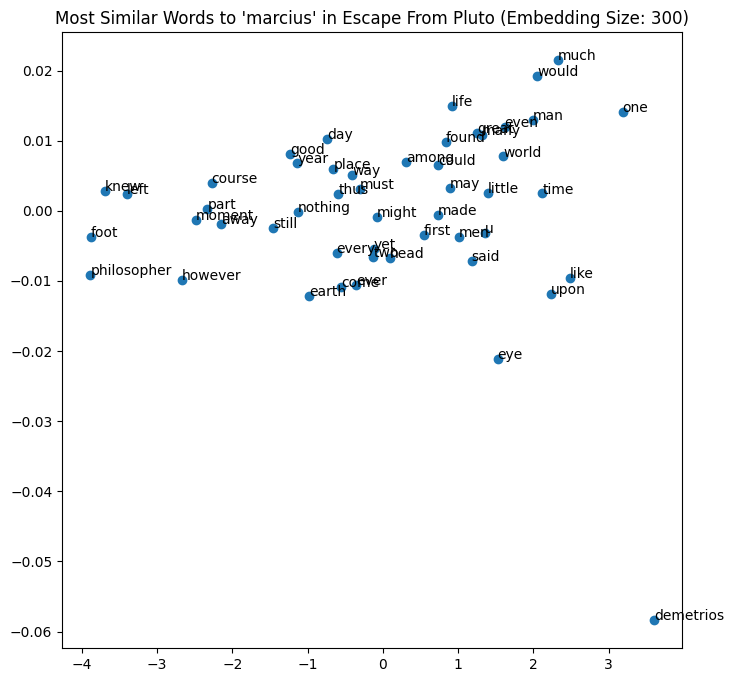

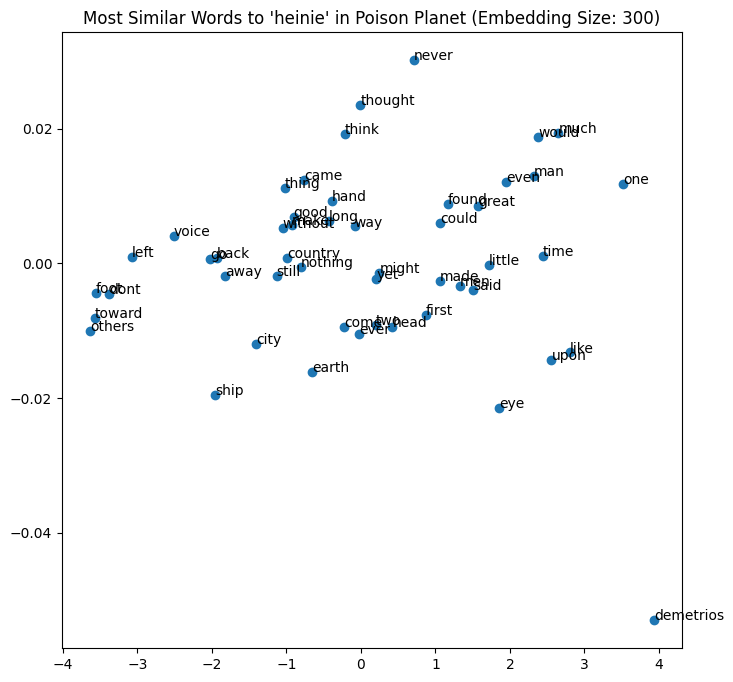

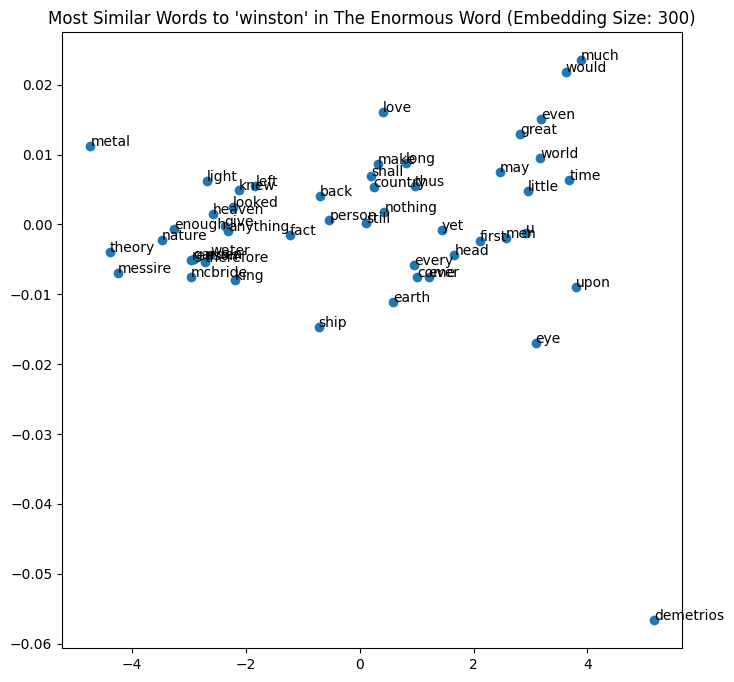

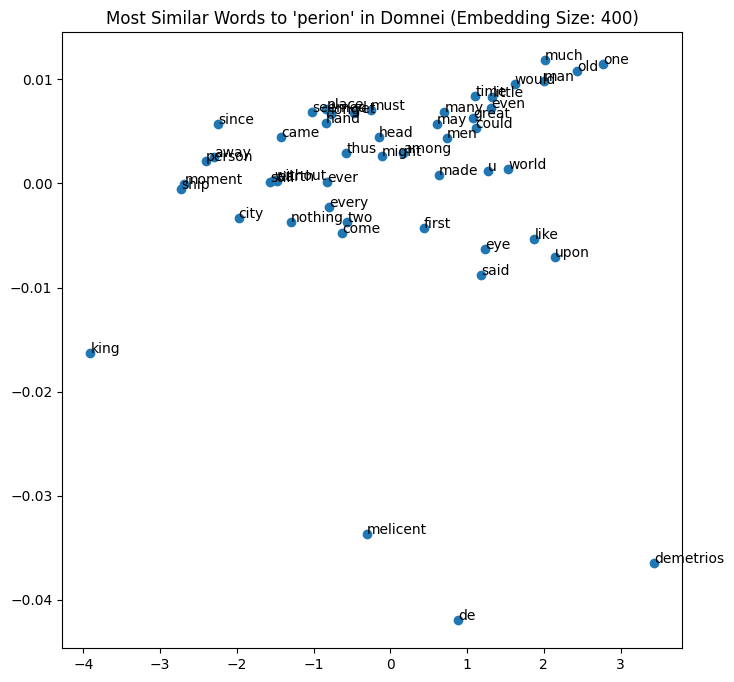

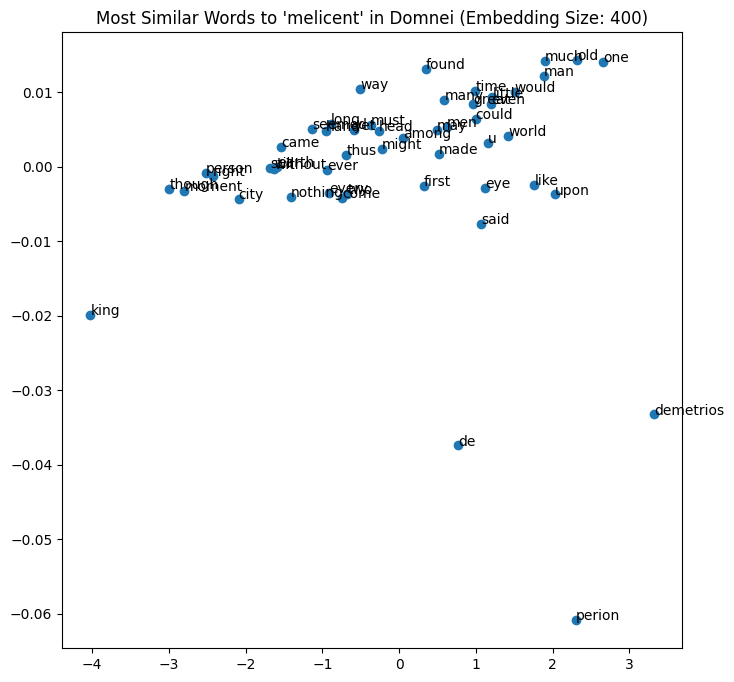

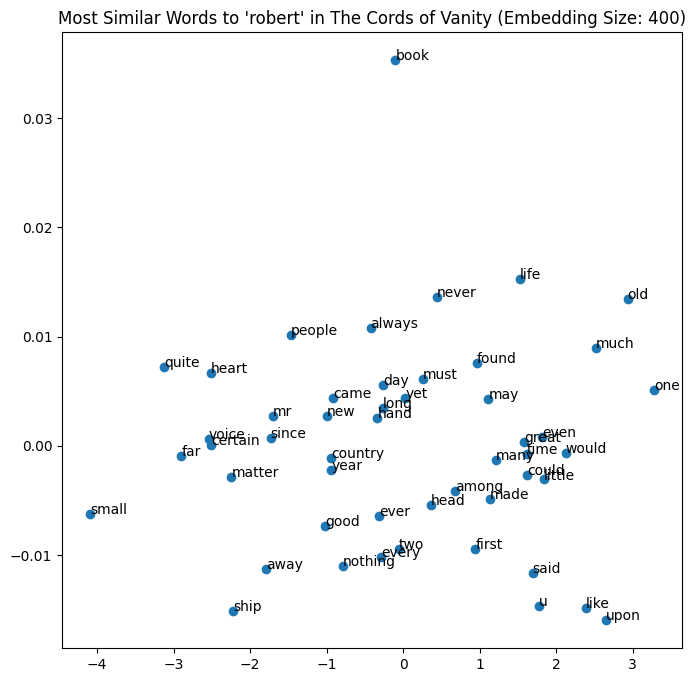

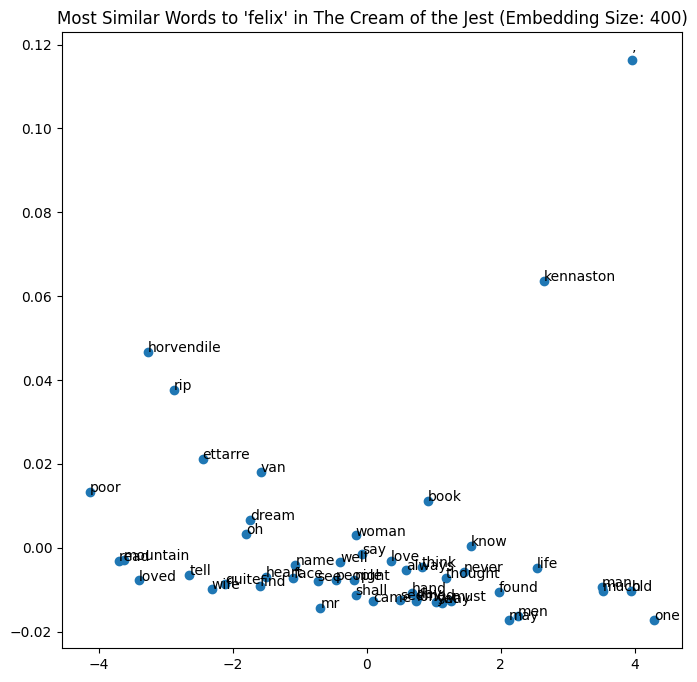

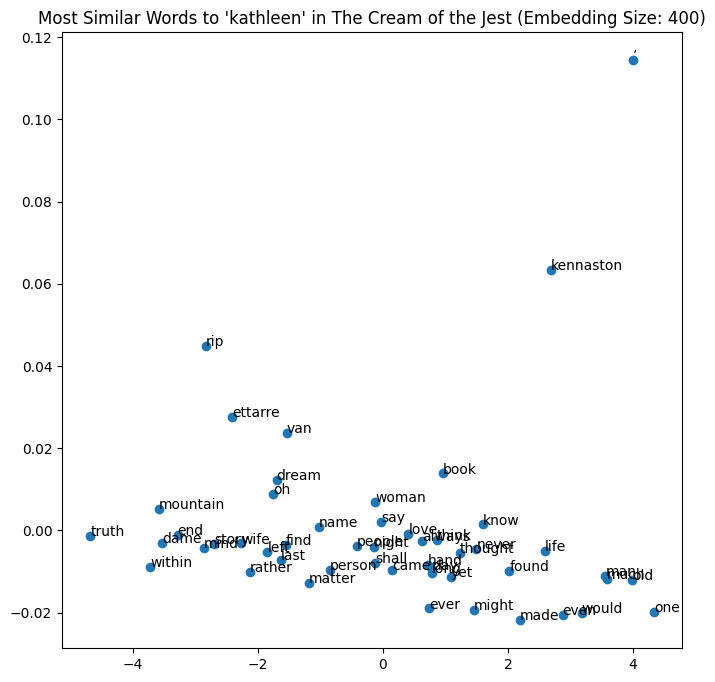

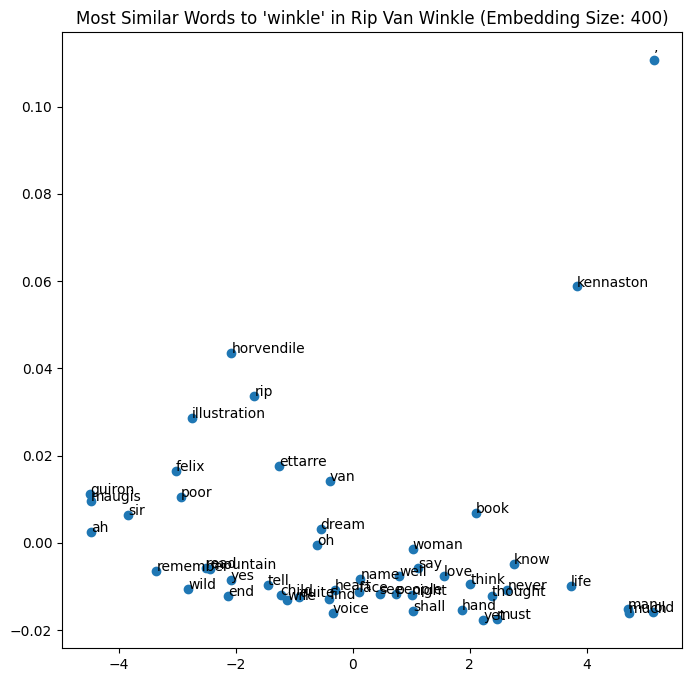

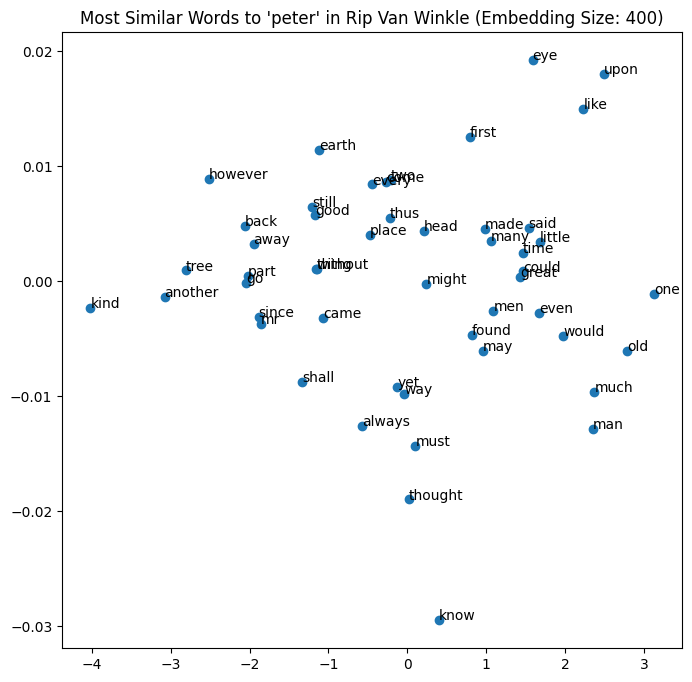

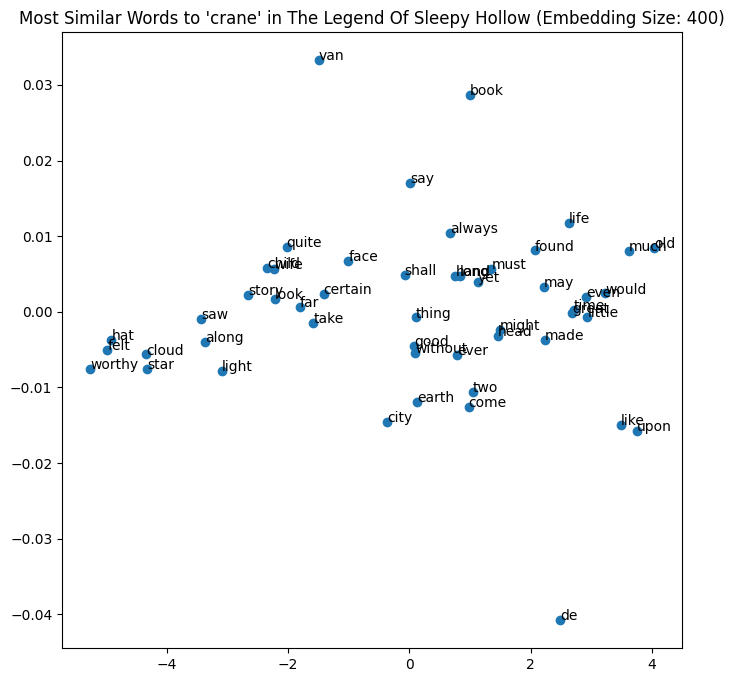

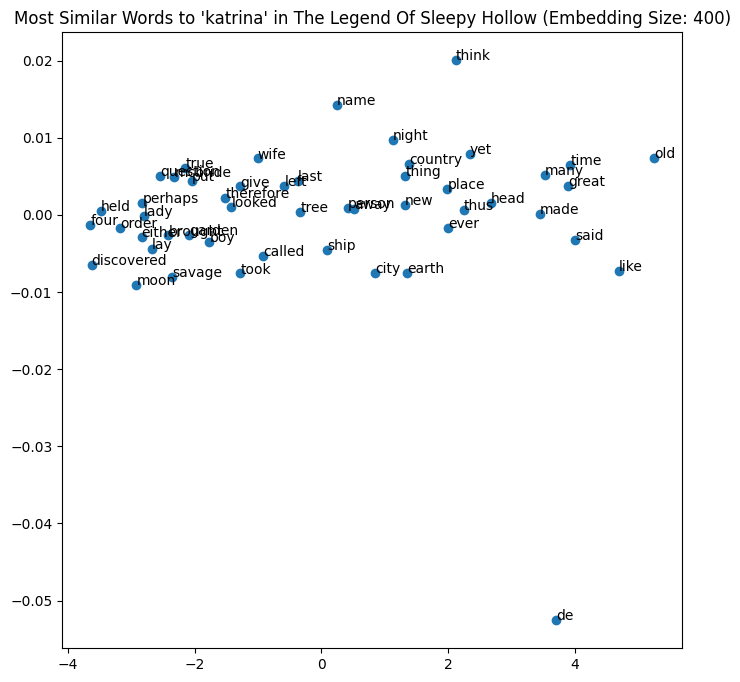

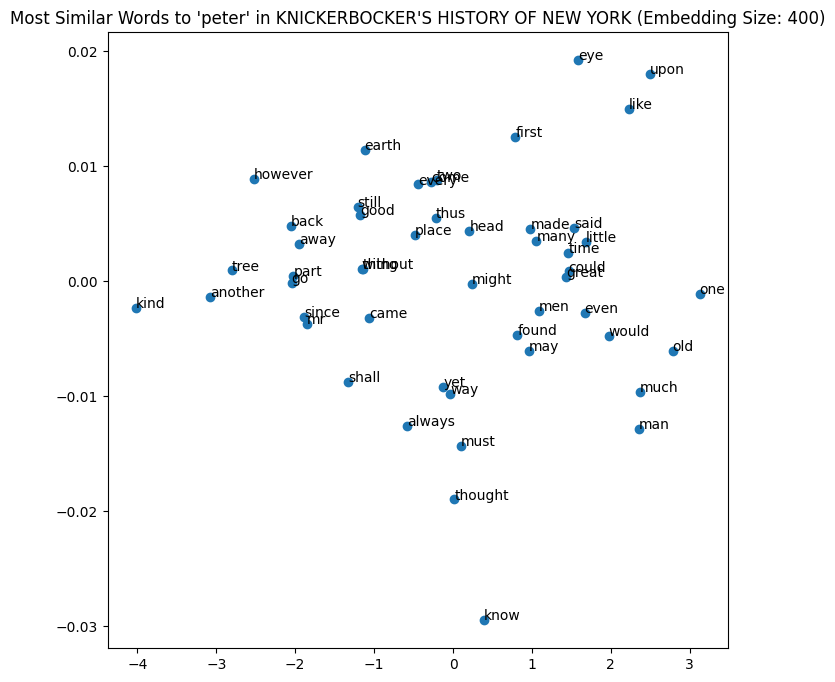

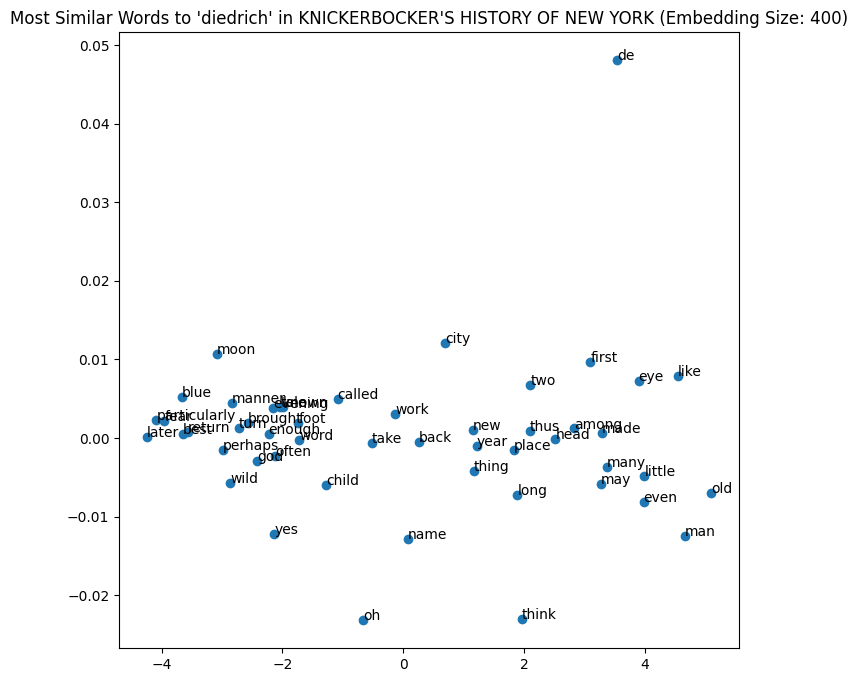

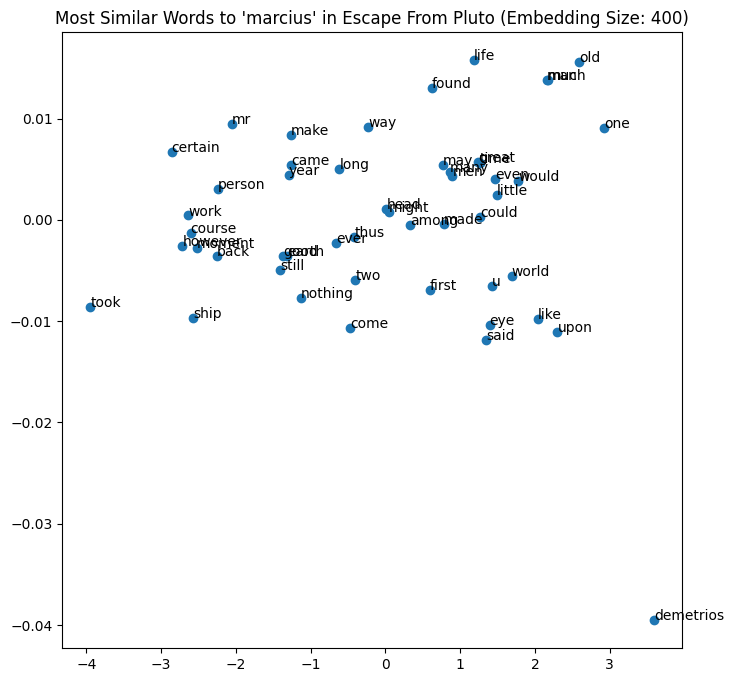

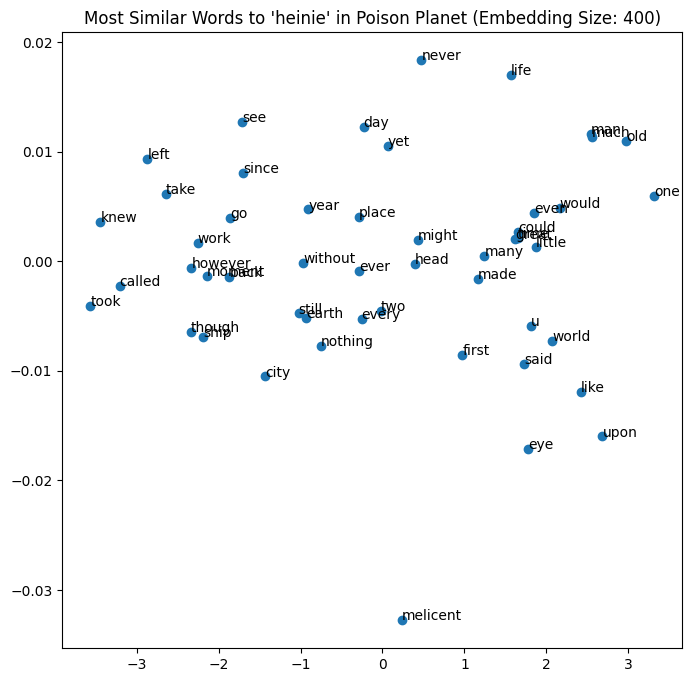

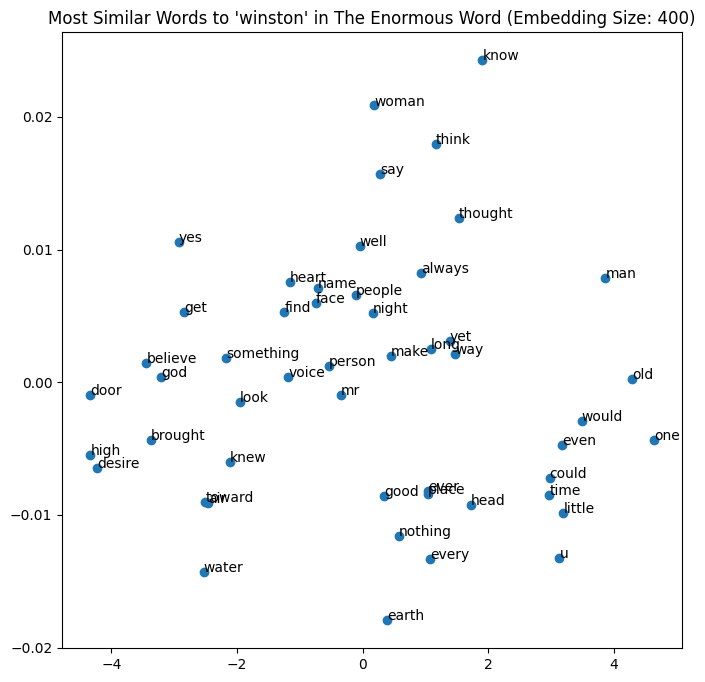

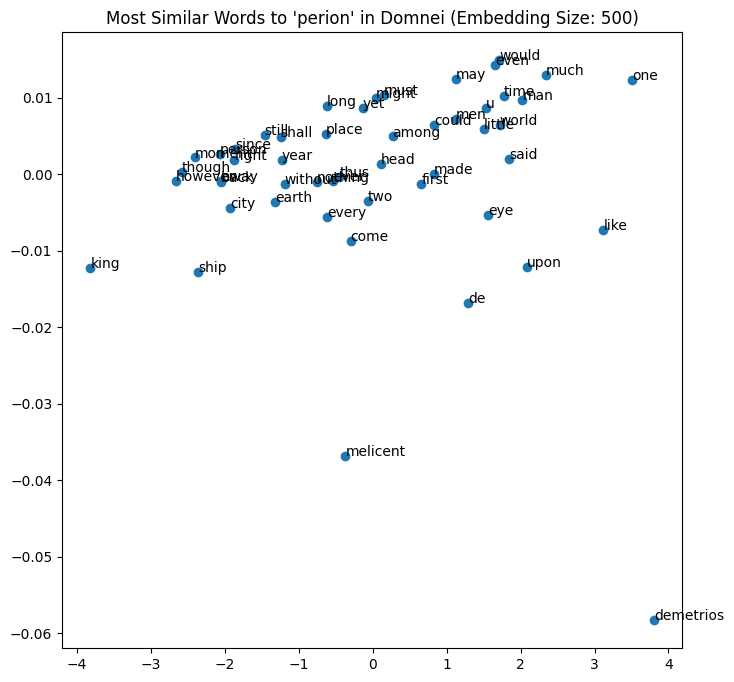

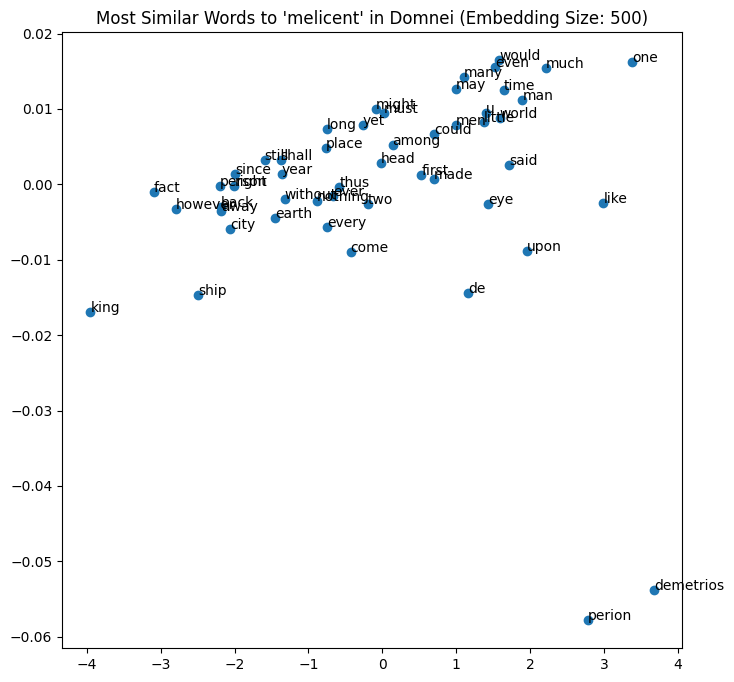

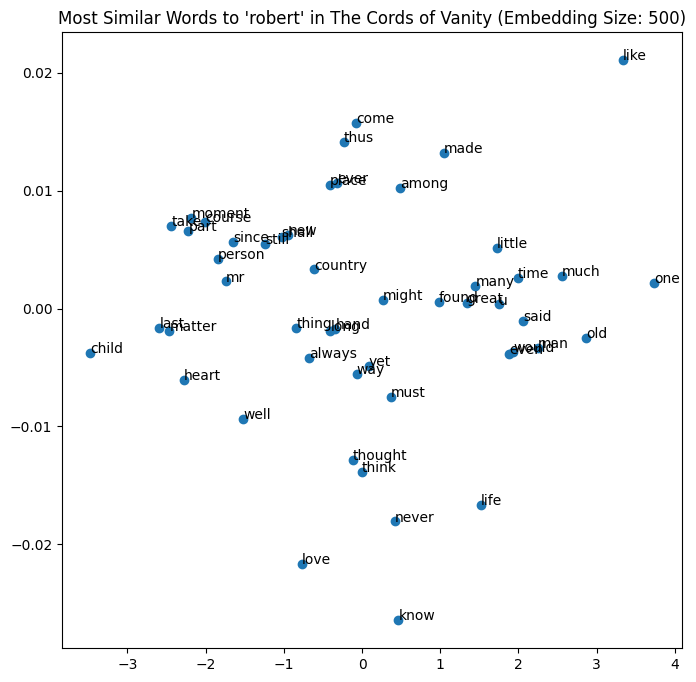

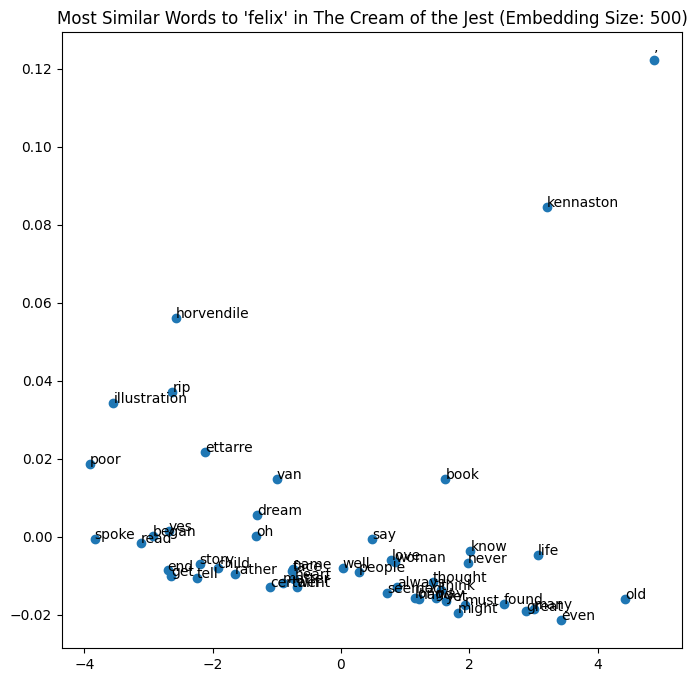

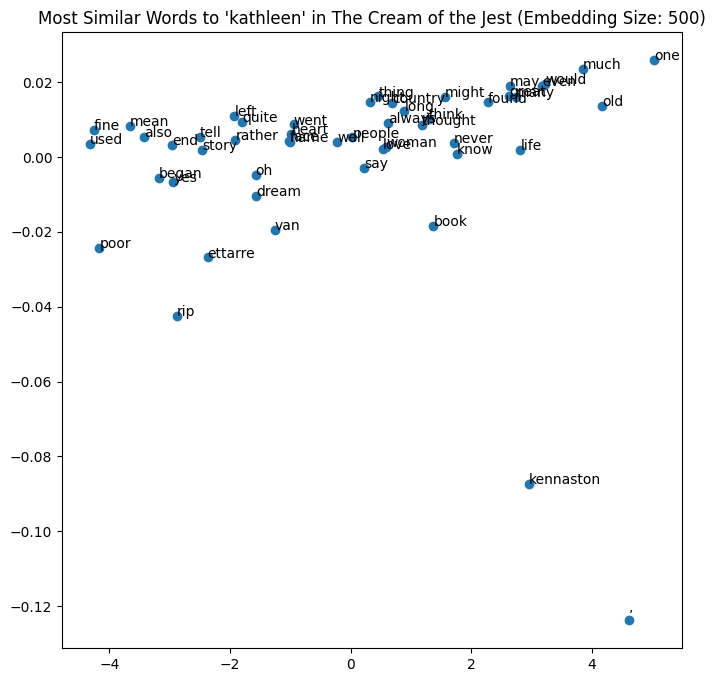

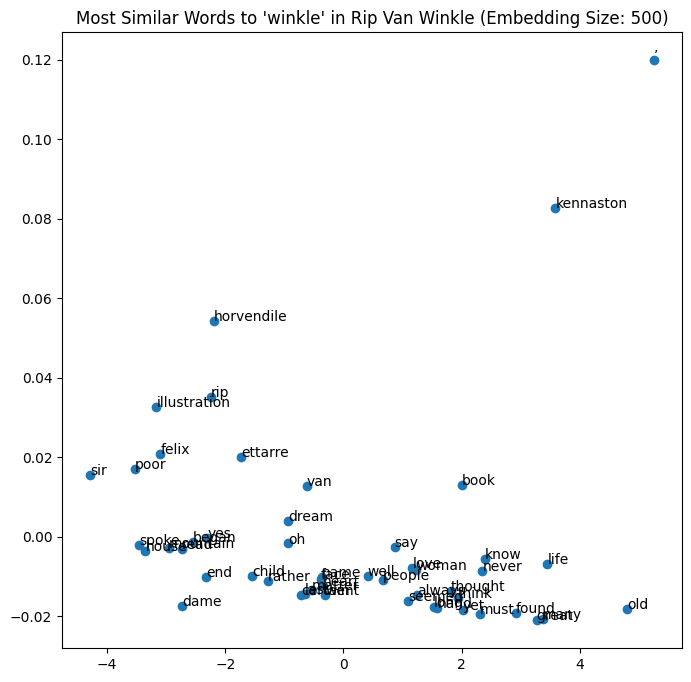

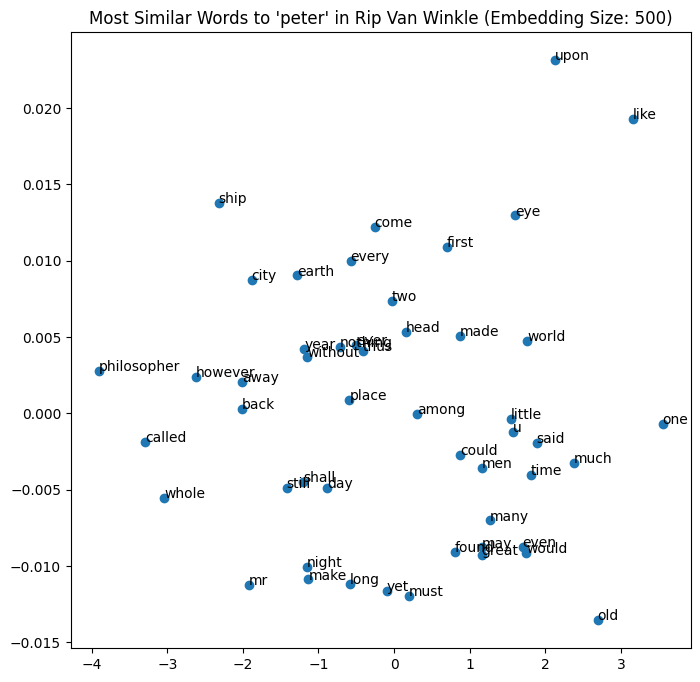

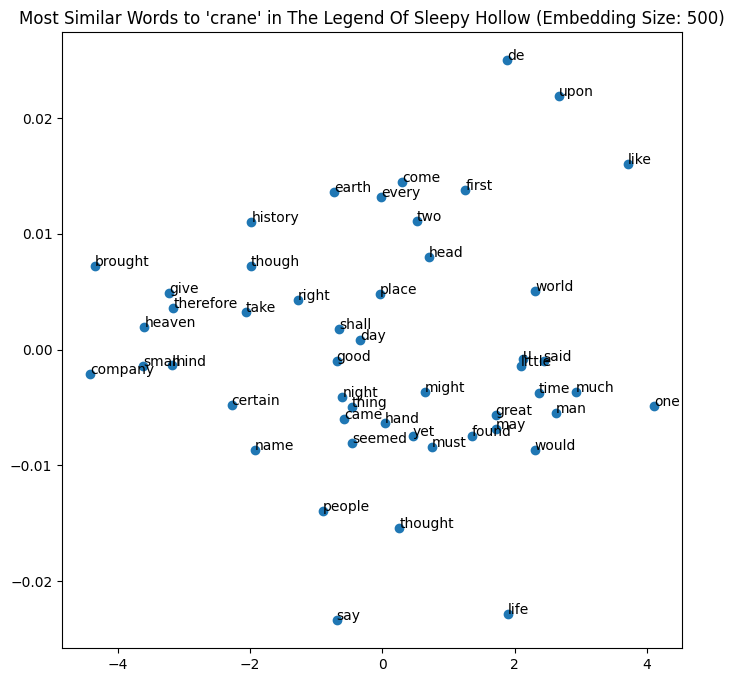

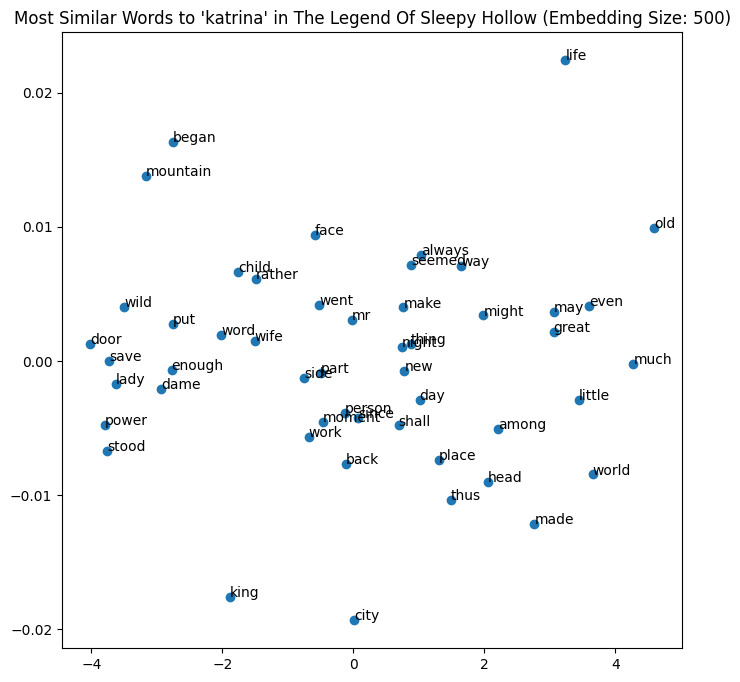

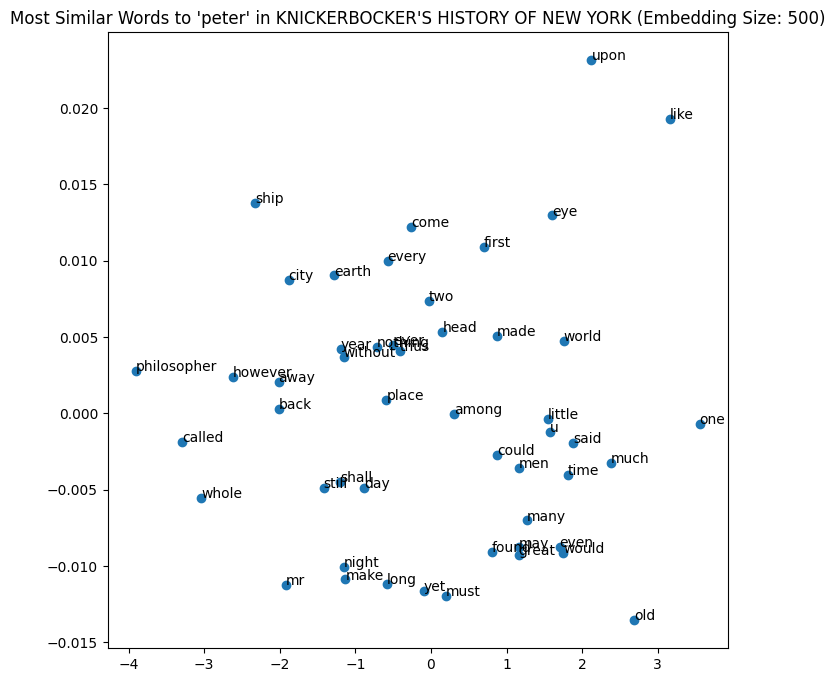

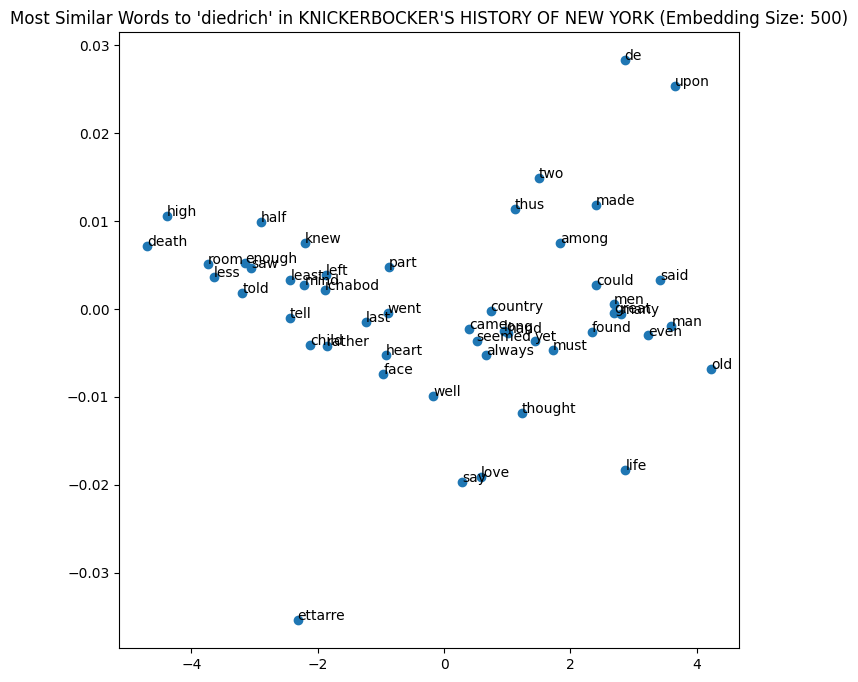

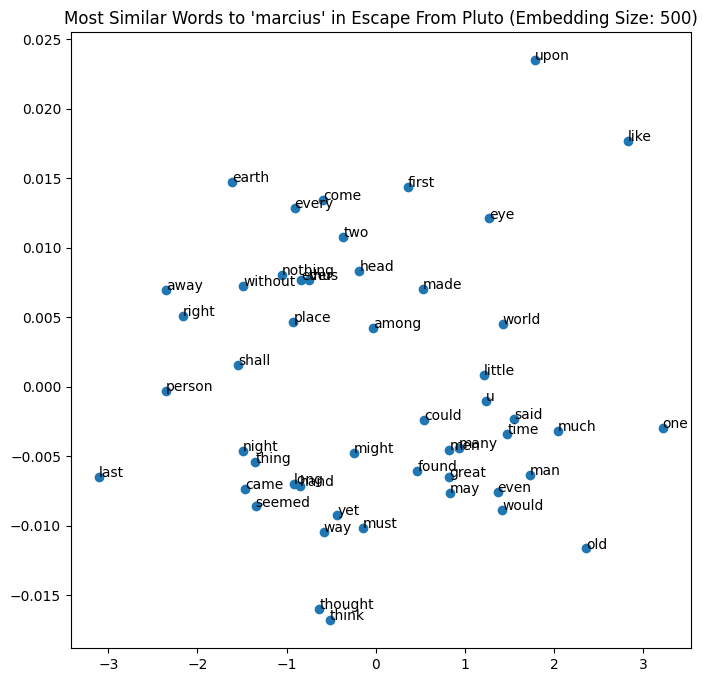

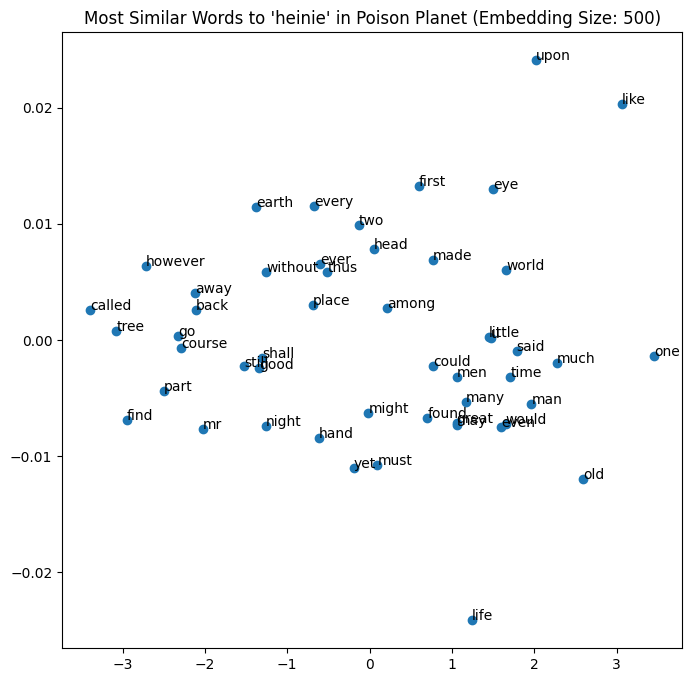

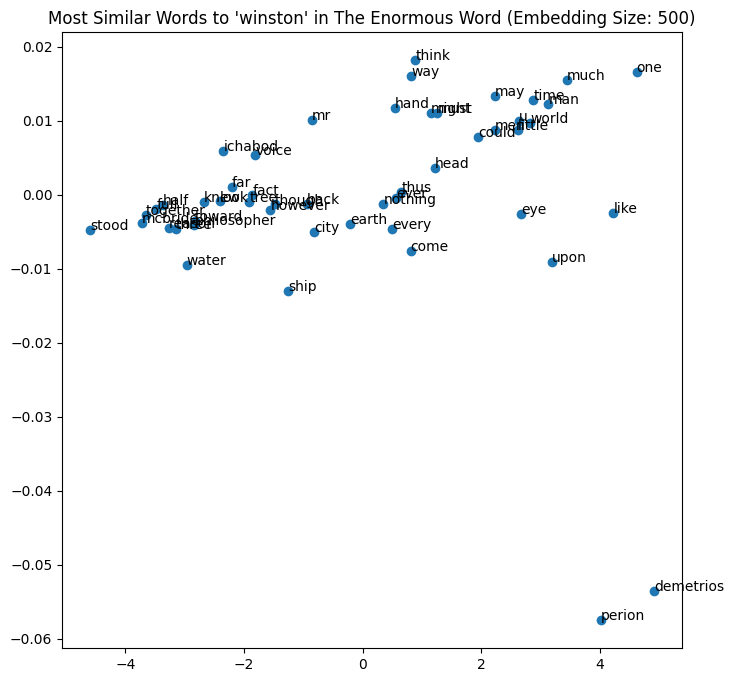

In [78]:
main_characters = {
    "Domnei": ["perion", "melicent"],
    "The Cords of Vanity": ["robert"],
    "The Cream of the Jest": ["felix", "kathleen"],
    "Rip Van Winkle" : ["winkle", "peter"],
    "The Legend Of Sleepy Hollow" : ["crane", "katrina"],
    "KNICKERBOCKER'S HISTORY OF NEW YORK" : ["peter", "diedrich"],
    "Escape From Pluto": ["marcius"],
    "Poison Planet": ["heinie"],
    "The Enormous Word": ["winston"]
}

for size in embedding_sizes:
    model = Word2Vec.load(f'Books_{size}_{group_code}.model')
    
    for book, characters in main_characters.items():
        for char in characters:
            similar_words = model.wv.most_similar(char, topn=50)
            words = [word for word, _ in similar_words]
            word_vectors = np.array([model.wv[word] for word in words])
            pca = PCA(n_components=2)
            reduced_vectors = pca.fit_transform(word_vectors)
            plt.figure(figsize=(8, 8))
            plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1])
            for i, word in enumerate(words):
                plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]))
            plt.title(f"Most Similar Words to '{char}' in {book} (Embedding Size: {size})")
            plt.show()